In [2]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 729.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 129.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.0 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [4]:

PathdataSet="/content/drive/MyDrive/BrainTumor/BrainTumorDataset/Training/"
# Flower_Classification_deep_Learing/flowers/train
dirs=os.listdir(PathdataSet)

total=0
for folder in (dirs):
   folder_path=os.path.join(PathdataSet,folder)
  #  print(folder_path)
   files=os.listdir(folder_path)
  #  print(files)
   total+=len(files)
   print(f"{folder} Folder has Images {total}")
# dirs=os.listdir(PathdataSet)
# print(dirs)


pituitary Folder has Images 904
notumor Folder has Images 2499
meningioma Folder has Images 3838
glioma Folder has Images 5159


In [6]:
Image_size=180
batch_size=32

In [7]:
train_data_set=tf.keras.utils.image_dataset_from_directory(
    PathdataSet,
    validation_split=0.2,
    seed=123,
    subset="training",
    image_size=(Image_size,Image_size),
    batch_size=batch_size,
    shuffle=True
)
validate_data_set=tf.keras.utils.image_dataset_from_directory(
    PathdataSet,
    validation_split=0.2,
    seed=123,
    subset="validation",
    image_size=(Image_size,Image_size),
    batch_size=batch_size,
    shuffle=True
)

Found 5159 files belonging to 4 classes.
Using 4128 files for training.
Found 5159 files belonging to 4 classes.
Using 1031 files for validation.


Display Directory Names


In [8]:
brain_classes=train_data_set.class_names
print(brain_classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [9]:
import matplotlib.pyplot as plt

# Featch Images Form Directory

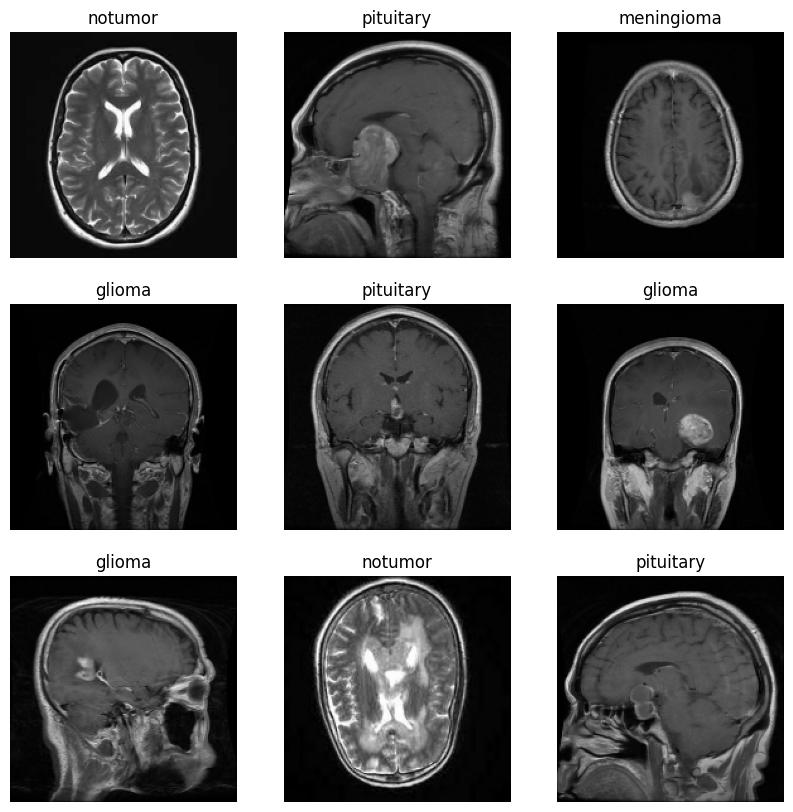

In [10]:
i=0
plt.figure(figsize=(10,10))
for image, label in train_data_set.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(brain_classes[label[i]])
    plt.axis("off")

#     i = 0
# plt.figure(figsize=(10,10))

# for images, labels in train_data_set.take(1):
#     for i in range(9):
#         plt.subplot(3,3, i+1)
#         plt.imshow(images[i].numpy().astype('uint8'))
#         plt.title(flower_name[labels[i]])
#         plt.axis('off')

In [11]:
autotune=tf.data.AUTOTUNE
train_data_set=train_data_set.cache().shuffle(1000).prefetch(buffer_size=autotune)
validate_data_set=validate_data_set.cache().prefetch(buffer_size=autotune)

In [12]:
data_agumentation=Sequential([
    layers.RandomFlip("horizontal",input_shape=(Image_size,Image_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


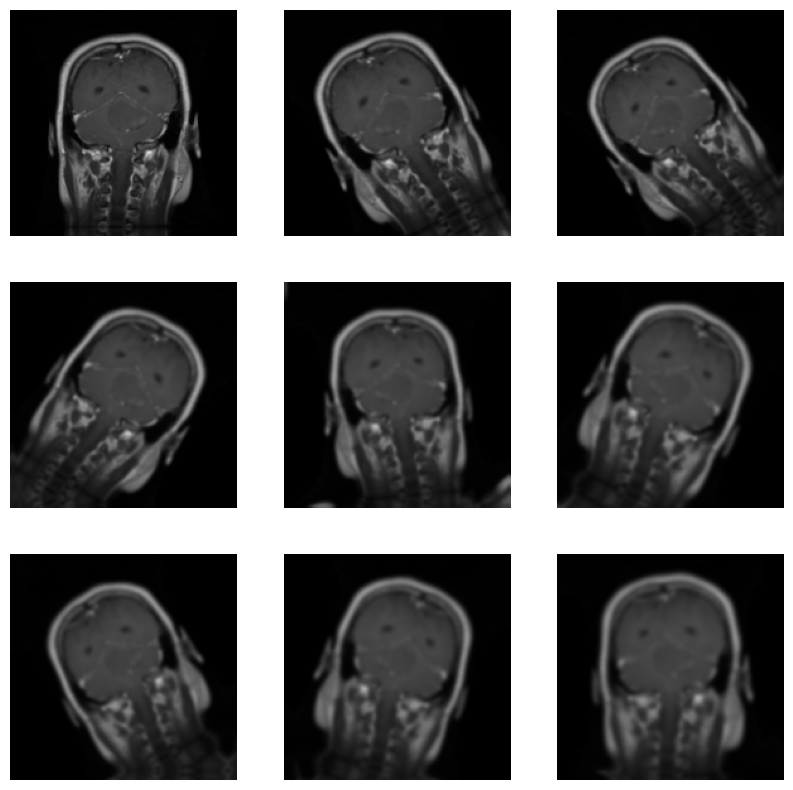

In [13]:
i=0
plt.figure(figsize=(10,10))
for image, label in train_data_set.take(1):
  for i in range(9):
    image=data_agumentation(image)
    plt.subplot(3,3,i+1)
    plt.imshow(image[0].numpy().astype("uint8"))
    # plt.title(brain_classes[label[i]])
    plt.axis("off")

In [14]:
model=Sequential([
    data_agumentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(len(brain_classes))
])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,156 (15.22 MB)

 Trainable params: 3,989,156 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [18]:
model.fit(train_data_set,validation_data=validate_data_set,epochs=10)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 64s 491ms/step - accuracy: 0.5153 - loss: 1.1082 - val_accuracy: 0.7924 - val_loss: 0.5419
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 54s 418ms/step - accuracy: 0.7548 - loss: 0.6094 - val_accuracy: 0.8332 - val_loss: 0.4742
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 53s 413ms/step - accuracy: 0.8071 - loss: 0.4944 - val_accuracy: 0.7546 - val_loss: 0.5843
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 53s 408ms/step - accuracy: 0.8149 - loss: 0.4610 - val_accuracy: 0.8322 - val_loss: 0.4762
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 52s 406ms/step - accuracy: 0.8314 - loss: 0.4219 - val_accuracy: 0.8487 - val_loss: 0.4211
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 52s 406ms/step - accuracy: 0.8531 - loss: 0.3741 - val_accuracy: 0.8487 - val_loss: 0.4475
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 53s 408ms/step - accuracy: 0.8656 - loss: 0.3381 - val_accuracy: 0.8846 - val_loss: 0.3117
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 52s 407ms/step - accuracy: 0.8802 - loss: 0

In [19]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,967,470 (45.65 MB)

 Trainable params: 3,989,156 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,314 (30.43 MB)

PREDICTITON IMAGE

In [25]:
image_predict=tf.keras.utils.load_img("/content/drive/MyDrive/BrainTumor/BrainTumorDataset/Testing/meningioma/Te-me_0040.jpg",target_size=(Image_size,Image_size))
image_predict=tf.keras.utils.img_to_array(image_predict)
image_predict=tf.expand_dims(image_predict,0)
prediction=model.predict(image_predict)
output_image=tf.nn.softmax(prediction[0])
output_image=tf.argmax(output_image)
print(brain_classes[output_image])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
notumor
